In [16]:
!pip install numpy==1.19.3
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3 MB 43 kB/s 
     |████████████████████████████████| 449 kB 52.1 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 3.8 MB 34.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f4e8139287a383970fca544c4b08d5a63d01ab87b17a31eb0d88c273b0c88cec
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

#Part 1


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
	return(1/(1 + np.exp(-x)))

def f_forward(x, w1, w2):

	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)
	return(a2)

def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

def back_prop(x, y, w1, w2, alpha):
	
	z1 = x.dot(w1)
	a1 = sigmoid(z1)
	z2 = a1.dot(w2)
	a2 = sigmoid(z2)

	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	print("Accuracy:")
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("Epoch", j + 1,":", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of array A.")
	elif(k == 1):
		print("Image is of array B.")
	else:
		print("Image is of array C.")
	plt.imshow(x.reshape(6, 6))
	plt.show()

In [ ]:
a = np.array([random.randrange(2) for i in range(36)]).reshape((1,36))
b = np.array([random.randrange(2) for i in range(36)]).reshape((1,36))
c = np.array([random.randrange(2) for i in range(36)]).reshape((1,36))

x = [a,b,c]
y = np.eye(3,dtype=int)

w1 = generate_wt(36, 6)
w2 = generate_wt(6, 3)

acc, losss, w1, w2 = train(x, y, w1, w2)

Image is of letter B.


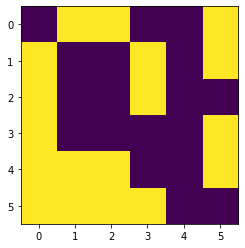

In [ ]:
predict(x[1], w1, w2)

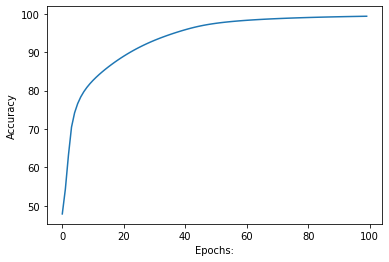

In [ ]:
plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

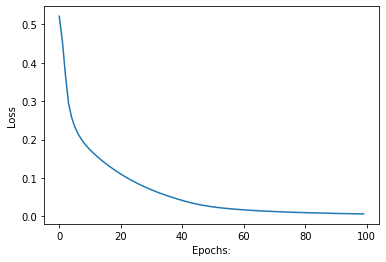

In [ ]:
plt.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

#Part 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.utils import np_utils

Layer Structure:

Layer 1: Flatten Layer

Layer 2: Fully Connected Layer

Layer 3: Activation Layer using Relu

Layer 4: Fully Connected Layer

Layer 5: Softmax for Output

In [ ]:
class Layer1:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def forward(self, input):
        return np.reshape(input, (1, -1))
    
    def backward(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

class Layer2:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.bias

    def backward(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # bias_error = output_error
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

class Layer3:
    
    def relu(self,x):
      return np.maximum(x, 0)

    def relu_prime(self,x):
        return np.array(x >= 0).astype('int')
    
    def forward(self, input):
        self.input = input
        return self.relu(input)
    
    def backward(self, output_error, learning_rate):
        return output_error * self.relu_prime(self.input)

class Layer5:
    def __init__(self, input_size):
        self.input_size = input_size
    
    def forward(self, input):
        self.input = input
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_error, learning_rate):
        input_error = np.zeros(output_error.shape)
        out = np.tile(self.output.T, self.input_size)
        return self.output * np.dot(output_error, np.identity(self.input_size) - out)

In [ ]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_pred.size

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32')
x_train /= 255
y_train = np_utils.to_categorical(y_train)
x_train = x_train[0:1000]
y_train = y_train[0:1000]

x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
network = [
    Layer1(input_shape=(28,28)),
    Layer2(28*28, 128),
    Layer3(),
    Layer2(128, 10), #Layer 4
    Layer5(10)
]

epochs = 50
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y_true in zip(x_train, y_train):

        output = x
        for layer in network:
            output = layer.forward(output)
        
        error += mse(y_true, output)

        output_error = mse_prime(y_true, output)
        for layer in reversed(network):
            output_error = layer.backward(output_error, learning_rate)
    
    error /= len(x_train)
    print("Epoch",epoch + 1,":", error)

Epoch 1 : 0.06334304988727872
Epoch 2 : 0.041158179426643605
Epoch 3 : 0.0336947745950262
Epoch 4 : 0.028922016504214415
Epoch 5 : 0.02550336976905842
Epoch 6 : 0.022906866925231778
Epoch 7 : 0.021106556099983204
Epoch 8 : 0.019572852487719405
Epoch 9 : 0.018144256405718026
Epoch 10 : 0.017190895038684175
Epoch 11 : 0.01636113636872607
Epoch 12 : 0.015408643128997911
Epoch 13 : 0.014814380319008107
Epoch 14 : 0.014402197854703131
Epoch 15 : 0.013856474682033014
Epoch 16 : 0.013291009624498626
Epoch 17 : 0.012637047945385796
Epoch 18 : 0.011475730899368838
Epoch 19 : 0.010918318547605287
Epoch 20 : 0.011323904124263677
Epoch 21 : 0.010507182851826148
Epoch 22 : 0.010050243205062622
Epoch 23 : 0.010126756075271887
Epoch 24 : 0.009585634716444129
Epoch 25 : 0.011250662102862116
Epoch 26 : 0.01019764946077536
Epoch 27 : 0.00887540053100248
Epoch 28 : 0.008880208481072595
Epoch 29 : 0.008160866903971007
Epoch 30 : 0.008335509872585599
Epoch 31 : 0.008478381843549201
Epoch 32 : 0.00732779937

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

ratio = sum([np.argmax(y) == np.argmax(predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
error = sum([mse(y, predict(network, x)) for x, y in zip(x_test, y_test)]) / len(x_test)
print('ratio: %.2f' % ratio)
print('mse: %.4f' % error)

ratio: 0.77
mse: 0.0358


#Part - 3

In [ ]:
import torch as T
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
def oneHotEncoding(y, num_labels=10):
    one_hot = T.zeros(num_labels, y.shape[0])
    for i, val in enumerate(y):
        one_hot[val,i] = 1.0

    return one_hot

def addBias(layer, orientation):
    if orientation == 'row':
        new_layer = T.ones((layer.shape[0]+1, layer.shape[1]))
        new_layer[1:, :] = layer
    elif orientation == 'col':
        new_layer = T.ones((layer.shape[0], layer.shape[1] + 1))
        new_layer[:, 1:] = layer
    return new_layer

def initializeWeights(n_input, n_hidden_1, n_hidden_2, n_output, batch_size):
    w1 = T.randn((n_hidden_1, n_input+1), dtype=T.float)
    w2 = T.randn((n_hidden_2, n_hidden_1+1), dtype=T.float)
    w3 = T.randn((n_output, n_hidden_2+1), dtype=T.float)

    return w1, w2, w3

def forwardPropagation(input, w1, w2, w3):
    a1 = T.reshape(input, shape=(input.shape[0], -1))
    a1 = addBias(a1, orientation='col')

    z2 = w1.matmul(T.transpose(a1, 0, 1))
    a2 = T.sigmoid(z2)
    a2 = addBias(a2, orientation='row')

    z3 = w2.matmul(a2)
    a3 = T.sigmoid(z3)
    a3 = addBias(a3, orientation='row')

    z4 = w3.matmul(a3)
    a4 = T.sigmoid(z4)

    return a1, z2, a2, z3, a3, z4, a4

def predict(a4):
    prediction = T.argmax(a4, dim=0)

    return prediction

def computeLoss(prediction, label):
    term_1 = -1*label * T.log(prediction)
    term_2 = (1-label)*(T.log(1-prediction))

    loss = T.sum(term_1 - term_2)
    return loss

def backwardPropagation(weights, outputs, label):
    w1, w2, w3 = weights
    a1, z2, a2, z3, a3, z4, a4 = outputs

    delta_4 = a4 - label
    delta_3 = T.transpose(w3[:,1:], 0,1).matmul(delta_4)*\
             T.sigmoid(z3)*(1-T.sigmoid(z3))
    delta_2 = w2[:,1:].matmul(delta_3)*T.sigmoid(z2)*(1-T.sigmoid(z2))

    grad_w1 = delta_2.matmul(a1)
    grad_w2 = delta_3.matmul(T.transpose(a2,0,1))
    grad_w3 = delta_4.matmul(T.transpose(a3,0,1))

    return grad_w1, grad_w2, grad_w3

batch_size = 50
n_input = 28*28

w1, w2, w3 = initializeWeights(n_input,100, 100, 10, batch_size)

eta = 0.001 
alpha = 0.01 
num_epochs = 100 

delta_w1_prev = T.zeros(w1.shape)
delta_w2_prev = T.zeros(w2.shape)
delta_w3_prev = T.zeros(w3.shape)

train_losses = []
train_acc = []

fashionMNIST_train_data = FashionMNIST('FashionMNIST',
                          train=True, download=True, transform=ToTensor())
train_data = T.utils.data.DataLoader(fashionMNIST_train_data,
                                            batch_size=batch_size)
fashionMNIST_test_data = FashionMNIST('FashionMNIST',
                        train=False, download=True, transform=ToTensor())
test_data = T.utils.data.DataLoader(fashionMNIST_test_data,
                                            batch_size=10)

for i in range(num_epochs):
    for j, (input, label) in enumerate(train_data):
        one_hot_label = oneHotEncoding(label, num_labels=10)
        a1, z2, a2, z3, a3, z4, a4 = forwardPropagation(input, w1,w2,w3)
        loss = computeLoss(a4, one_hot_label.float())
        grad1, grad2, grad3 = backwardPropagation([w1, w2, w3],
                                        [a1, z2, a2, z3, a3, z4, a4],
                                        one_hot_label.float())

        delta_w1, delta_w2, delta_w3 = eta*grad1, eta*grad2, eta*grad3

        w1 -= delta_w1 + delta_w1_prev*alpha
        w2 -= delta_w2 + delta_w2_prev*alpha
        w3 -= delta_w3 + delta_w3_prev*alpha

        delta_w1_prev, delta_w2_prev, delta_w3_prev = \
                                                delta_w1, delta_w2, delta_w3

        train_losses.append(loss)
        predictions = predict(a4)

        wrong = T.where(predictions != label,
                        T.tensor([1.]), T.tensor([0.]))
        accuracy = 1 - T.sum(wrong)/batch_size
        train_acc.append(accuracy.float())

    print('Epoch:', i, 'Accuracy:',str(T.mean(T.tensor(train_acc)).item()))

Epoch: 0 Accuracy: 0.5137500166893005
Epoch: 1 Accuracy: 0.5908832550048828
Epoch: 2 Accuracy: 0.628849983215332
Epoch: 3 Accuracy: 0.6529791951179504
Epoch: 4 Accuracy: 0.6706166863441467
Epoch: 5 Accuracy: 0.6846721768379211
Epoch: 6 Accuracy: 0.6961975693702698
Epoch: 7 Accuracy: 0.7059479355812073
Epoch: 8 Accuracy: 0.714222252368927
Epoch: 9 Accuracy: 0.7214615941047668
Epoch: 10 Accuracy: 0.7279999256134033
Epoch: 11 Accuracy: 0.7339193820953369
Epoch: 12 Accuracy: 0.7393076419830322
Epoch: 13 Accuracy: 0.7442166209220886
Epoch: 14 Accuracy: 0.7487033605575562
Epoch: 15 Accuracy: 0.752819836139679
Epoch: 16 Accuracy: 0.7566137313842773
Epoch: 17 Accuracy: 0.7601092457771301
Epoch: 18 Accuracy: 0.7633675336837769
Epoch: 19 Accuracy: 0.7664166688919067
Epoch: 20 Accuracy: 0.7692674398422241
Epoch: 21 Accuracy: 0.7719537019729614
Epoch: 22 Accuracy: 0.7745022177696228
Epoch: 23 Accuracy: 0.7769089937210083
Epoch: 24 Accuracy: 0.7791873216629028
Epoch: 25 Accuracy: 0.7813417911529541

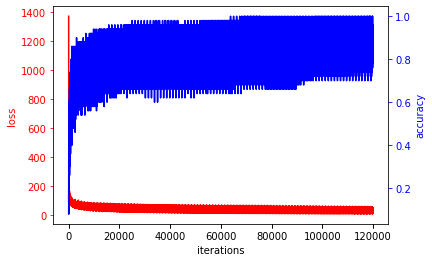


-------------

EVALUATE TEST DATA

Testing Accuracy 0.97


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, label='1')
ax2 = fig.add_subplot(111, label='2', frame_on=False)
ax.plot(train_losses, color='red')
ax.set_xlabel('iterations')
ax.set_ylabel('loss', color='red')
ax.tick_params(axis='y', colors="red")
ax2.plot(train_acc, color='blue')
ax2.yaxis.tick_right()
ax2.set_ylabel('accuracy', color='blue')
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="blue")
ax2.set_xticklabels([])
plt.show()

print('\n-------------\n')
print('EVALUATE TEST DATA\n')

test_acc = []
for j, (input, label) in enumerate(test_data):
    one_hot_label = oneHotEncoding(label, num_labels=10)
    a1, z2, a2, z3, a3, z4, a4 = forwardPropagation(input,w1,w2,w3)
    loss = computeLoss(a4, one_hot_label.float())

    predictions = predict(a4)
    wrong = T.where(predictions != label, T.tensor([1.]),  T.tensor([0.]))
    accuracy = 1 - T.sum(wrong)/batch_size
    test_acc.append(accuracy)
print('Testing Accuracy %.2f' % T.mean(T.tensor(test_acc)).item())

#Part - 4

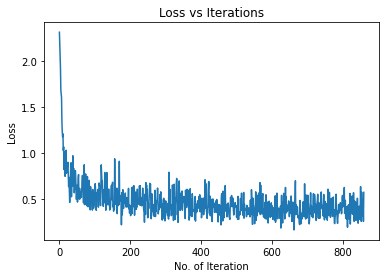

Validation Loss:  0.38031357526779175


In [8]:
import torch
import pytorch_lightning as pl
import os
from torch import nn
from torch.utils.data import DataLoader, random_split
from torch.nn import functional as F
from torchvision.datasets import FashionMNIST
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

class FashionMNISTClassifier(nn.Module):

  def __init__(self):
    super(FashionMNISTClassifier, self).__init__()

    self.layer1 = torch.nn.Linear(28 * 28, 128)
    self.layer2 = torch.nn.Linear(128, 256)
    self.layer3 = torch.nn.Linear(256, 10)

  def forward(self, x):
    batch_size, channels, width, height = x.size()

    x = x.view(batch_size, -1)

    x = self.layer1(x)
    x = torch.relu(x)

    x = self.layer2(x)
    x = torch.relu(x)

    x = self.layer3(x)
    x = torch.log_softmax(x, dim=1)

    return x

transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
fashionMnistTrainData = FashionMNIST(os.getcwd(), train=True, download=True, transform=transform)
fashionMnistTestData = FashionMNIST(os.getcwd(), train=False, download=True, transform=transform)

fashionMnistTrainData, fashionMnistValidationData = random_split(fashionMnistTrainData, [55000, 5000])
fashionMnistTestData = FashionMNIST(os.getcwd(), train=False, download=True)

fashionMnistTrainData = DataLoader(fashionMnistTrainData, batch_size=64)
fashionMnistValidationData = DataLoader(fashionMnistValidationData, batch_size=64)
fashionMnistTestData = DataLoader(fashionMnistTestData, batch_size=64)

pytorch_model = FashionMNISTClassifier()
optimizer = torch.optim.Adam(pytorch_model.parameters(), lr=1e-3)

def cross_entropy_loss(logits, labels):
  return F.nll_loss(logits, labels)

training_loss = []
for epoch in range(1):

  for train_batch in fashionMnistTrainData:
    x, y = train_batch

    logits = pytorch_model(x)
    loss = cross_entropy_loss(logits, y)
    training_loss.append(loss.item()) 
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

  plt.plot(training_loss)
  plt.xlabel("No. of Iteration")
  plt.ylabel("Loss")
  plt.title("Loss vs Iterations")
  plt.show()


  with torch.no_grad():
    val_loss = []
    for val_batch in fashionMnistValidationData:
      x, y = val_batch
      logits = pytorch_model(x)
      val_loss.append(cross_entropy_loss(logits, y).item())


    val_loss = torch.mean(torch.tensor(val_loss))
    print('Validation Loss: ', val_loss.item())

#Part - 5

In [44]:
import numpy as np

no_of_samples = 200
dimension = 7
x = np.random.normal(-1,1,(no_of_samples,dimension)) #low,high,size 
weights = np.array([range(7),]).T
bias = np.array([1])

y = (x**2) @ weights + x@weights + bias

print("Tensor Info\n\nDimensions:",dimension)
print("Tensor Shape:",x.shape)
print("Weight Shape:",weights.shape)
print("Bias Shape:", bias.shape)
print("No. of Samples:",no_of_samples)
print("Sample Shape:",y.shape)


Tensor Info

Dimensions: 7
Tensor Shape: (200, 7)
Weight Shape: (7, 1)
Bias Shape: (1,)
No. of Samples: 200
Sample Shape: (200, 1)


#Part - 6

In [45]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

input_dimension = 2
output_dimension = 1
learning_rate = 0.01

In [46]:
weights = tf.Variable(tf.random.uniform(shape=(input_dimension, output_dimension)))
bias = tf.Variable(tf.zeros(shape=(output_dimension,)))

def compute_predictions(features):
  return tf.matmul(features, weights) + bias

def compute_loss(labels, predictions):
  return tf.reduce_mean(tf.square(labels - predictions))

In [47]:
num_of_samples = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 5], cov=[[1, 0.5],[0.5, 1]], size=num_of_samples)
positive_samples = np.random.multivariate_normal(
    mean=[5, 0], cov=[[1, 0.5],[0.5, 1]], size=num_of_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_of_samples, 1), dtype='float32'),
                    np.ones((num_of_samples, 1), dtype='float32')))

Now let's train our linear regression by iterating over batch-by-batch over the data and repeatedly calling `train_on_batch`:

In [48]:
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(64)

for epoch in range(10):
  for step, (x, y) in enumerate(dataset):
    with tf.GradientTape() as tape:
      predictions = compute_predictions(x)
      loss = compute_loss(y, predictions)
      dloss_dw, dloss_db = tape.gradient(loss, [weights, bias])
    weights.assign_sub(learning_rate * dloss_dw)
    bias.assign_sub(learning_rate * dloss_db)

Here's how our model performs:

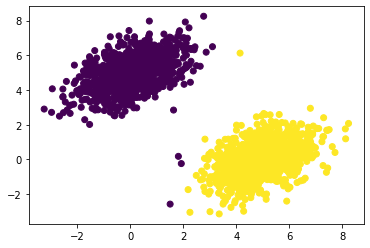

In [50]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

#Part - 7

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
a = 2
b = 3
x = (np.random.rand(1, 200) -0.5)*2
y_raw = (a*x)**2 + (b*x)  + 1
y = y_raw/np.max(y_raw)

In [ ]:
batch_size = 5
epochs = 1000
hidden_units = 12

In [ ]:
indices = np.arange(0,x.shape[1])
np.random.shuffle(indices)
x_train = x[:,indices[:int(float(len(indices))*0.7)]]
x_test = x[:,indices[int(float(len(indices))*0.7):]]
y_train = y[:,indices[:int(float(len(indices))*0.7)]]
y_test = y[:,indices[int(float(len(indices))*0.7):]]
train_num_batches = int(float(x_train.shape[1])/batch_size)
test_num_batches = int(float(x_test.shape[1])/batch_size)
print("X Train shape: ", x_train.shape)
print("Y Train shape: ", y_train.shape)
print("X Test shape: ", x_test.shape)
print("Y Test shape: ", y_test.shape)

X Train shape:  (1, 140)
Y Train shape:  (1, 140)
X Test shape:  (1, 60)
Y Test shape:  (1, 60)


In [ ]:
X = tf.placeholder(tf.float32, shape=[1, batch_size], name='x')
Y = tf.placeholder(tf.float32, shape=[1, batch_size], name='y')

W1 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[hidden_units,1]), name='W1')
b1 = tf.Variable(tf.zeros((hidden_units,1)), tf.float32, name='b1')

z1 = tf.add(tf.matmul(W1, X), b1)
a1 = tf.nn.relu(z1)

W2 = tf.Variable(tf.random_normal(dtype=tf.float32, shape=[1,hidden_units]), name='W2')
b2 = tf.Variable(tf.zeros((1,1)), tf.float32, name='b2')

z2 = tf.add(tf.matmul(W2, a1), b2)
y_hat = tf.tanh(z2)

cost = tf.reduce_mean(tf.square(Y - y_hat))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost, var_list=[W1,b1,W2,b2])

init = tf.global_variables_initializer()

In [ ]:
slider = 0
slider_max = train_num_batches*epochs
losses = []
with tf.Session() as sess:
    sess.run(init)
    for m in range(0,epochs):
        loss = []
        for k in range(0,train_num_batches):
            x_batch = x_train[:, k*batch_size:k*batch_size+batch_size]
            y_batch = y_train[:, k*batch_size:k*batch_size+batch_size]
            sess.run(train, feed_dict={X: x_batch, Y: y_batch})
            loss_ = sess.run(cost, feed_dict={X: x_batch, Y: y_batch})
            loss.append(loss_)
            slider += 1
        losses.append(np.mean(loss))
            
    losses_test = []
    for k in range(test_num_batches):
        x_batch = x_test[:, k*batch_size:k*batch_size+batch_size]
        y_batch = y_test[:, k*batch_size:k*batch_size+batch_size]
        plt.scatter(x_batch[0], sess.run(y_hat, feed_dict={X: x_batch})[0], c='blue', alpha=.5)
        plt.scatter(x_batch[0], y_batch[0], c='orange', alpha=.7)
        losses_test.append(sess.run(cost, feed_dict={X: x_batch, Y: y_batch}))
    loss_test = np.mean(losses_test)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.legend(["PREDICTED", "REAL"])
    plt.show()
  